# 概率

In [1]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [2]:
fair_probs = torch.ones([6]) / 6; fair_probs

tensor([0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667])

In [8]:
multinomial.Multinomial(1, fair_probs).sample()

tensor([1., 0., 0., 0., 0., 0.])

In [9]:
multinomial.Multinomial(10, fair_probs).sample()

tensor([1., 1., 2., 1., 0., 5.])

In [10]:
multinomial.Multinomial(1000, fair_probs).sample()

tensor([174., 173., 173., 165., 154., 161.])

In [11]:
multinomial.Multinomial(1000, fair_probs).sample() / 1000

tensor([0.1830, 0.1520, 0.1780, 0.1890, 0.1430, 0.1550])

In [12]:
multinomial.Multinomial(10, fair_probs).sample((500,))

tensor([[1., 1., 4., 1., 0., 3.],
        [3., 2., 2., 0., 1., 2.],
        [2., 3., 0., 0., 1., 4.],
        ...,
        [0., 4., 1., 1., 3., 1.],
        [0., 3., 2., 2., 1., 2.],
        [2., 3., 0., 1., 3., 1.]])

In [14]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
cum_counts

tensor([[  2.,   0.,   3.,   1.,   1.,   3.],
        [  3.,   2.,   3.,   3.,   4.,   5.],
        [  5.,   2.,   6.,   5.,   7.,   5.],
        ...,
        [841., 871., 840., 847., 816., 765.],
        [841., 874., 843., 848., 818., 766.],
        [844., 876., 845., 849., 819., 767.]])

In [15]:
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
estimates

tensor([[0.2000, 0.0000, 0.3000, 0.1000, 0.1000, 0.3000],
        [0.1500, 0.1000, 0.1500, 0.1500, 0.2000, 0.2500],
        [0.1667, 0.0667, 0.2000, 0.1667, 0.2333, 0.1667],
        ...,
        [0.1689, 0.1749, 0.1687, 0.1701, 0.1639, 0.1536],
        [0.1685, 0.1752, 0.1689, 0.1699, 0.1639, 0.1535],
        [0.1688, 0.1752, 0.1690, 0.1698, 0.1638, 0.1534]])

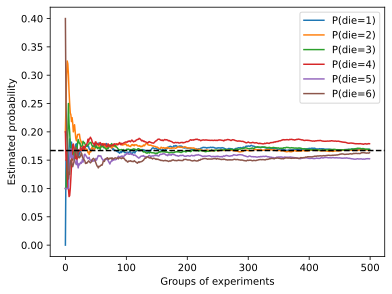

In [13]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

## 练习

In [16]:
multinomial.Multinomial(500, fair_probs).sample((10,))

tensor([[ 80.,  93.,  73.,  84.,  92.,  78.],
        [ 87.,  75.,  80.,  78., 101.,  79.],
        [ 83.,  85.,  79.,  97.,  71.,  85.],
        [ 74., 101.,  81.,  63.,  99.,  82.],
        [ 82.,  82.,  91.,  86.,  90.,  69.],
        [ 86.,  82.,  86.,  80.,  86.,  80.],
        [ 70.,  93.,  87.,  87.,  70.,  93.],
        [ 85.,  90.,  92.,  76.,  89.,  68.],
        [ 78.,  89.,  85.,  98.,  73.,  77.],
        [ 65.,  83.,  89.,  82.,  81., 100.]])

### 练习3

$$
\begin{aligned}
P(A,B,C) &= P(C|A,B) * P(A,B) \\
&= P(C|B) * P(B|A) * P(A)
\end{aligned}
$$